In [13]:
import arcpy
from arcgis.gis import GIS

import pandas as pd
from arcgis.features import GeoAccessor, GeoSeriesAccessor

import numpy as np
import matplotlib.pyplot as plt

In [4]:
gis = GIS()

## Question 1

In [5]:
arcpy.env.workspace = r'C:\Users\drewt\Desktop\Stuff\college\GEOG4324\Kellenberger_Assignment6'

buildings = 'Buildings.shp'
pavement = 'Edge_of_Pavement.shp'
sidewalks = 'Sidewalks.shp'
town = 'Corporate_Limits.shp'

In [15]:
arcpy.management.AddField(buildings, "area", "FLOAT")
arcpy.management.AddField(pavement, "area", "FLOAT")
arcpy.management.AddField(sidewalks, "area", "FLOAT")
arcpy.management.AddField(town, "area", "FLOAT")

<Result 'Corporate_Limits.shp'>

In [16]:
arcpy.management.CalculateGeometryAttributes(buildings, [['area', "AREA_GEODESIC"]], "", "SQUARE_METERS")
arcpy.management.CalculateGeometryAttributes(pavement, [['area', "AREA_GEODESIC"]], "", "SQUARE_METERS")
arcpy.management.CalculateGeometryAttributes(sidewalks, [['area', "AREA_GEODESIC"]], "", "SQUARE_METERS")
arcpy.management.CalculateGeometryAttributes(town, [['area', "AREA_GEODESIC"]], "", "SQUARE_METERS")

<Result 'C:\\Users\\drewt\\Desktop\\Stuff\\college\\GEOG4324\\Kellenberger_Assignment6\\Corporate_Limits.shp'>

In [6]:
buildings_df = pd.DataFrame.spatial.from_featureclass(buildings)
pavement_df = pd.DataFrame.spatial.from_featureclass(pavement)
sidewalks_df = pd.DataFrame.spatial.from_featureclass(sidewalks)
town_df = pd.DataFrame.spatial.from_featureclass(town)

In [7]:
buildings_sum = buildings_df['area'].sum()
pavement_sum = pavement_df['area'].sum()
sidewalks_sum = sidewalks_df['area'].sum()
town_sum = town_df['area'].sum()

In [8]:
print('% of Town Land Area covered by Buildings: ' + str((buildings_sum/town_sum)*100) + "%")
print('% of Town Land Area covered by Pavement: ' + str((pavement_sum/town_sum)*100) + "%")
print('% of Town Land Area covered by Sidewalks: ' + str((sidewalks_sum/town_sum)*100) + "%")

% of Town Land Area covered by Buildings: 4.557776453125812%
% of Town Land Area covered by Pavement: 11.875415838393629%
% of Town Land Area covered by Sidewalks: 1.724471525904234%


## Question 2

In [20]:
sidewalks_plot = sidewalks_sum/sidewalks_sum
buildings_plot = buildings_sum/sidewalks_sum
pavement_plot = pavement_sum/sidewalks_sum

x = ["Sidewalks", "Buildings", "Pavement"]
height = [sidewalks_plot, buildings_plot, pavement_plot]

<BarContainer object of 3 artists>

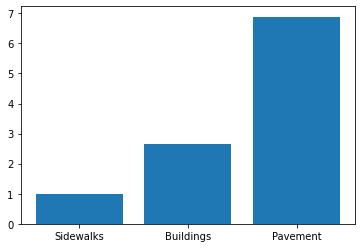

In [21]:
plt.bar(x, height)

## Question 3

In [24]:
arcpy.management.MinimumBoundingGeometry(town, r"C:\Users\drewt\Desktop\Stuff\college\GEOG4324\Kellenberger_Assignment6\townMBG", "CONVEX_HULL") 

<Result 'C:\\Users\\drewt\\Desktop\\Stuff\\college\\GEOG4324\\Kellenberger_Assignment6\\townMBG.shp'>

In [26]:
townMBG = 'townMBG.shp'

arcpy.management.AddField(townMBG, "area", "FLOAT")
arcpy.management.CalculateGeometryAttributes(townMBG, [['area', "AREA_GEODESIC"]], "", "SQUARE_METERS")
townMBG_df = pd.DataFrame.spatial.from_featureclass(townMBG)
townMBG_sum = townMBG_df['area'].sum()

In [27]:
print('% of Town Land Area covered by Buildings: ' + str((buildings_sum/townMBG_sum)*100) + "%")
print('% of Town Land Area covered by Pavement: ' + str((pavement_sum/townMBG_sum)*100) + "%")
print('% of Town Land Area covered by Sidewalks: ' + str((sidewalks_sum/townMBG_sum)*100) + "%")

% of Town Land Area covered by Buildings: 3.516607304533005%
% of Town Land Area covered by Pavement: 9.162620087042958%
% of Town Land Area covered by Sidewalks: 1.3305367709061289%
